## 1. Seaborn
- Matplotlib을 기반으로, 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) 확률 밀도 함수(Probability Density Function)
- 확률 밀도 함수는 데이터셋의 분포를 나타낸다.
- 특정 구간의 확률은 그래프 아래 그 구간의 면적과 동일하다.
- 그래프 아래의 모든 면적을 더하면 1이 된다.

### 2) 커널 밀도 추정(Kernel Density Estimation)
- 밀도 추정 : 어떤 변수가 가질 수 있는 값 및 그 값을 가질 가능성의 정도를 추정하는 것
- 커널함수(kernel function)를 이용하여 히스토그램 방법의 문제점을 개선한 방법
- 통계에서 말하는 밀도는 "확률 밀도"를 의미
- 어떤 변수 x의 밀도(density)를 추정하는 것은 x의 확률밀도함수(PDF)를 추정하는 것과 동일
- 어떤 변수 x의 확률밀도함수를 f(x)라고 할 때, x = a일 확률은 '0'이지만, x = a에서 밀도(density)는 f(a)로 0이 아니다.
- 밀도(density)는 PDF의 함수값이며 PDF를 일정 구간에 대해 적분하면 확률이 나온다.

In [31]:
df = pd.read_csv('./CSV_files/body.csv', index_col = 0)
df['Height'].value_counts().sort_index.plot()

AttributeError: 'function' object has no attribute 'plot'

<AxesSubplot:xlabel='Height', ylabel='Density'>

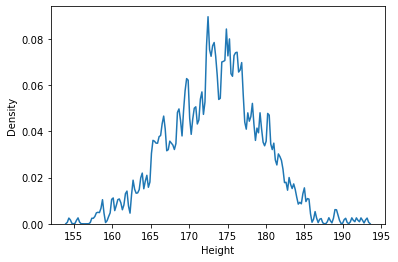

In [25]:
sns.kdeplot(df['Height'], bw_adjust = 0.1)  # 커널함수 이용

<AxesSubplot:xlabel='Height', ylabel='Density'>

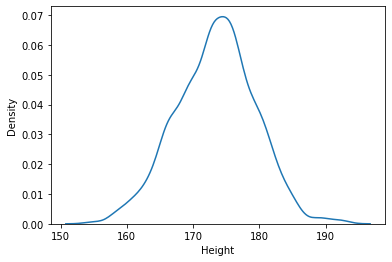

In [29]:
sns.kdeplot(df['Height'], bw_adjust = 0.8)  # bw_adjust 설정

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

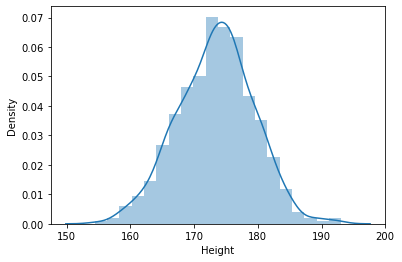

In [34]:
sns.distplot(df['Height'], bins = 20)  # 히스토그램 & KDE 함수

### 3)  KDE plot 활용

<AxesSubplot:ylabel='Height'>

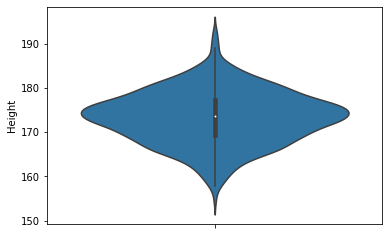

In [36]:
sns.violinplot(y = df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

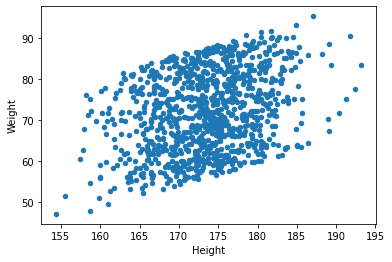

In [37]:
df.plot(kind = 'scatter', x = 'Height', y = 'Weight')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

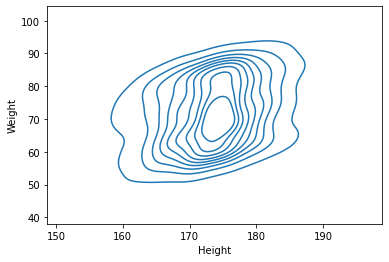

In [45]:
sns.kdeplot(x = df['Height'], y = df['Weight'])

### 4) LM plot 활용

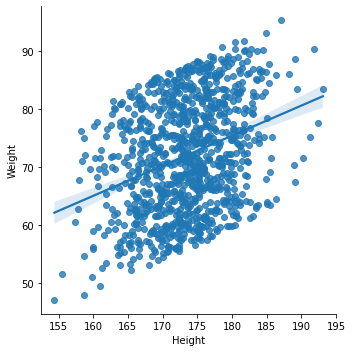

In [40]:
sns.lmplot(data = df, x = 'Height', y = 'Weight')  # regression line이 나타난다.

In [5]:
df = pd.read_csv('./CSV_files/laptops.csv')
df

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN


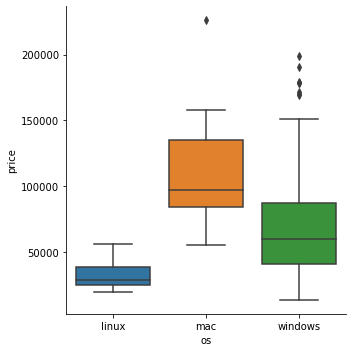

In [49]:
sns.catplot(data = df, x = 'os', y = 'price', kind = 'box')

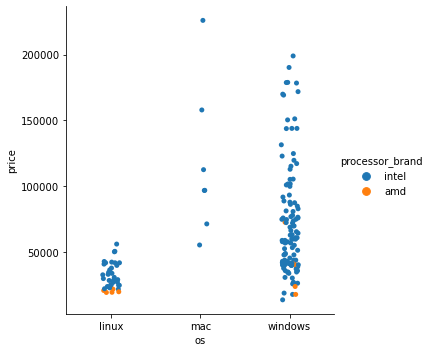

In [6]:
sns.catplot(data = df, x = 'os', y = 'price', kind = 'strip', hue = 'processor_brand')  # hue : 색

## 2. 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 변수 X, Y 간의 선형 상관관계를 계량화한 수치
- +1은 완벽한 양의 선형 상관 관계, 0은 선형 상관 관계 없음, -1은 완벽한 음의 선형 상관 관계를 의미


In [7]:
df.corr()  # corr() 메소드 : 숫자 데이터 사이의 상관계수를 보여준다.

,ram,hd_size,screen_size,price,clock_speed,graphic_card_size,weight
ram,1.000000,0.071715,0.210755,0.708068,0.548454,-0.009891,0.266139
hd_size,0.071715,1.000000,0.511792,-0.251644,0.267286,-0.188102,0.244376
screen_size,0.210755,0.511792,1.000000,-0.051607,0.228389,0.050138,0.621455
price,0.708068,-0.251644,-0.051607,1.000000,0.427685,-0.005662,0.130517
clock_speed,0.548454,0.267286,0.228389,0.427685,1.000000,0.102310,0.268222
graphic_card_size,-0.009891,-0.188102,0.050138,-0.005662,0.102310,1.000000,0.064471
weight,0.266139,0.244376,0.621455,0.130517,0.268222,0.064471,1.000000


<AxesSubplot:>

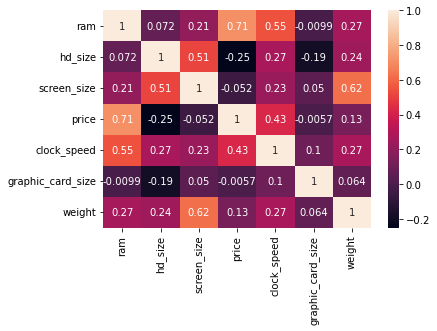

In [12]:
%matplotlib inline

sns.heatmap(df.corr(), annot = True)  # 히트맵(Heat Map) : 색이 밝을 수록 상관계수가 높다. (annot : 상관계수도 나타낸다.)

## 3. 탐색적 데이터 분석(Exploratory Data Analysis)
- 데이터셋을 다양한 관점에서 살펴보고 탐색하면서 인사이트를 찾는 것
- 한마디로 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정

- **EDA 과정 )**
    - 분석의 목적과 변수가 무엇이 있는지 확인. 개별 변수의 이름이나 설명을 가지는지 확인
    - 데이터를 전체적으로 살펴보기 : 데이터에 문제가 없는지 확인. head나 tail부분을 확인, 추가적으로 다양한 탐색(이상치, 결측치 등을 확인하는 과정)

    - 데이터의 개별 속성값을 관찰 : 각 속성 값이 예측한 범위와 분포를 갖는지 확인. 만약 그렇지 않다면, 이유가 무엇인지를 확인. 

    - 속성 간의 관계에 초점을 맞추어, 개별 속성 관찰에서 찾아내지 못했던 패턴을 발견 (상관관계, 시각화 등)

In [15]:
df = pd.read_csv("./CSV_files/occupations.csv", index_col = 0)
df

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [27]:
df.loc[df['gender'] == 'F', 'occupation'].value_counts().head(3)  # 여성 중 직종 상위 3개 추출

student          60
other            36
administrator    36
Name: occupation, dtype: int64

In [29]:
df.loc[df['gender'] == 'M', 'occupation'].value_counts().head(3)  # 남성 중 직종 상위 3개 추출

student     136
other        69
educator     69
Name: occupation, dtype: int64

In [33]:
df = pd.read_csv('./CSV_files/young_survey.csv')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [37]:
df.columns  # 변수 확인

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Spending on looks', 'Spending on gadgets',
       'Spending on healthy eating', 'Age', 'Height', 'Weight',
       'Number of siblings', 'Gender', 'Handedness', 'Education'],
      dtype='object', length=147)

In [40]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,994.000000,995.000000,993.000000,992.000000,992.000000,990.000000,995.000000,994.000000,991.000000,994.000000,...,995.000000,995.000000,994.000000,994.000000,997.000000,995.000000,997.000000,982.000000,981.000000,995.000000
mean,4.737425,3.334673,3.115811,2.293347,2.121976,2.956566,2.767839,3.476861,3.769929,2.367203,...,3.232161,3.057286,3.207243,3.109658,2.878636,3.554774,20.439318,173.610998,66.407747,1.300503
std,0.650716,0.830477,1.169023,1.140767,1.079224,1.253965,1.258920,1.157300,1.182167,1.374846,...,1.323587,1.306128,1.190474,1.207999,1.284881,1.095888,2.835443,9.373842,13.862403,1.015548
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,148.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,203.000000,165.000000,10.000000


<AxesSubplot:>

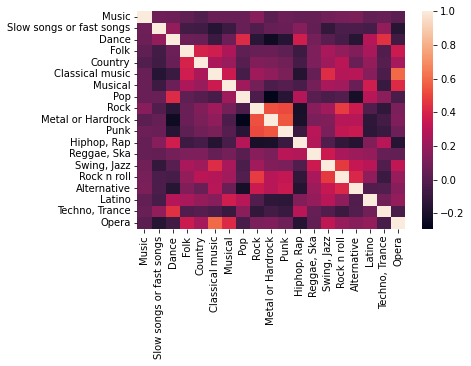

In [48]:
sns.heatmap(df.iloc[:, :19].corr())  # 음악과 관련된 0 ~ 19번 열에 대한 상관계수 히트맵

In [51]:
df.corr()['Age'].sort_values(ascending = False)  # 나이와 상관계수가 높은 순으로 나열

Age                        1.000000
Weight                     0.238893
Elections                  0.212319
Prioritising workload      0.156256
Reliability                0.148141
                             ...   
Mood swings               -0.111890
Getting up                -0.119888
Questionnaires or polls   -0.128187
Shopping centres          -0.133800
Changing the past         -0.146895
Name: Age, Length: 139, dtype: float64

In [59]:
df.corr()['Getting up'][1:19].sort_values(ascending = True)  # 일찍 일어나는 사람들 -> 오페라를 좋아하는 경향

Opera                      -0.071819
Slow songs or fast songs   -0.052613
Folk                       -0.049612
Punk                       -0.029189
Metal or Hardrock          -0.026769
Country                    -0.025315
Latino                     -0.015060
Reggae, Ska                -0.008434
Musical                     0.011869
Classical music             0.014285
Swing, Jazz                 0.019556
Techno, Trance              0.019863
Dance                       0.027249
Alternative                 0.027540
Rock n roll                 0.028889
Hiphop, Rap                 0.038980
Pop                         0.079101
Rock                        0.105245
Name: Getting up, dtype: float64

<AxesSubplot:>

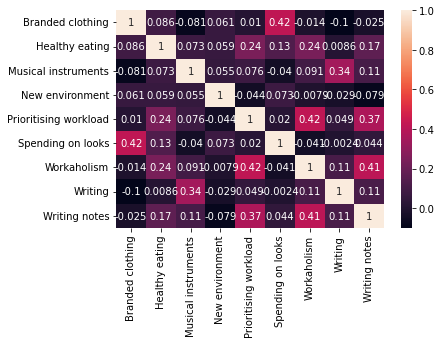

In [63]:
sns.heatmap(df.loc[:, ['Branded clothing', 'Healthy eating', 'Musical instruments', 'New environment', 'Prioritising workload', 'Spending on looks', 'Workaholism', 'Writing', 'Writing notes']].corr(), annot = True)

##  4. 클러스터 분석(Cluster Analysis)
- 주어진 데이터들의 특성을 고려해, 데이터 집단(클러스터)를 정의하고, 데이터 집단을 대표할 수 있는 대표점을 찾는 것

In [73]:
interest = df.loc[:,'Horror':'Action']
interest.head()

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0


In [75]:
corr = interest.corr()
corr['Horror'].sort_values(ascending = False)

Horror                 1.000000
Thriller               0.503069
Sci-fi                 0.165834
War                    0.136508
Action                 0.129958
Comedy                 0.098243
Western                0.078845
Animated               0.004865
Documentary           -0.063749
Fantasy/Fairy tales   -0.087150
Romantic              -0.128117
Name: Horror, dtype: float64

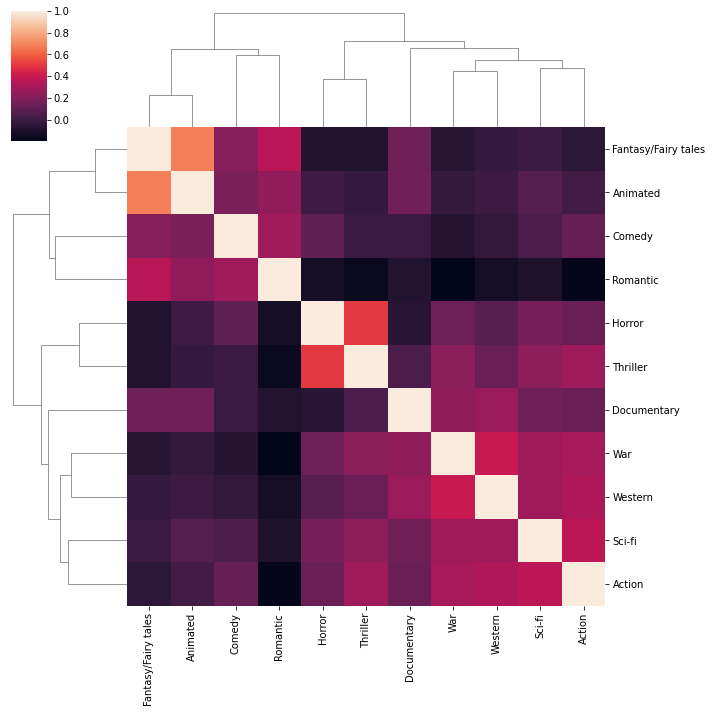

In [76]:
sns.clustermap(corr)

## ※ 5. 문자열 필터링

In [80]:
df = pd.read_csv('./CSV_files/albums.csv')
df

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara..."
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [84]:
df['Genre'].str.contains('Blues')  # 해당 문자열 포함 여부에 따라 Boolean값 리턴

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498     True
499    False
Name: Genre, Length: 500, dtype: bool

In [86]:
df.loc[df['Genre'].str.contains('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
14,15,1967,Are You Experienced,The Jimi Hendrix Experience,"Rock, Blues","Blues Rock, Psychedelic Rock"
18,19,1968,Astral Weeks,Van Morrison,"Jazz, Rock, Blues, Folk, World, & Country","Acoustic, Classic Rock, Free Improvisation"
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
48,49,1971,At Fillmore East,The Allman Brothers Band,"Rock, Blues",Blues Rock
49,50,1957,Here's Little Richard,Little Richard,"Rock, Blues","Rock & Roll, Rhythm & Blues"
54,55,1968,Electric Ladyland,The Jimi Hendrix Experience,"Rock, Blues","Electric Blues, Psychedelic Rock"
59,60,1969,Trout Mask Replica,Captain Beefheart & His Magic Band,"Rock, Blues","Dialogue, Field Recording, Avantgarde, Electri..."
101,102,1966,Fresh Cream,Cream,"Rock, Blues","Blues Rock, Electric Blues"
118,119,1960,At Last!,Etta James,"Funk / Soul, Blues","Rhythm & Blues, Soul"


In [88]:
df.loc[df['Genre'].str.startswith('Blues')]  # 해당 문자열로 시작하면 True

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,None
277,278,1997,Anthology of American Folk Music,Various,"Blues, Folk, World, & Country","Cajun, Country, Field Recording, Gospel, Delta..."
281,282,1964,Folk Singer,Muddy Waters,Blues,Delta Blues
376,377,1991,The Ultimate Collection: 1948-1990,John Lee Hooker,Blues,"Country Blues, Electric Blues, Chicago Blues, ..."
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [89]:
df['Album'].str.split()  # 문자열 분리

0      [Sgt., Pepper's, Lonely, Hearts, Club, Band]
1                                     [Pet, Sounds]
2                                        [Revolver]
3                          [Highway, 61, Revisited]
4                                    [Rubber, Soul]
                           ...                     
495                                   [Boz, Scaggs]
496                           [White, Blood, Cells]
497                             [The, Stone, Roses]
498                  [Live, in, Cook, County, Jail]
499                                      [Aquemini]
Name: Album, Length: 500, dtype: object

In [90]:
df['Album'].str.split(n=1, expand = True)  # n -> 띄어쓰기 개수, expand -> 새로운 데이터 프레임을 만든다.

,0,1
0,Sgt.,Pepper's Lonely Hearts Club Band
1,Pet,Sounds
2,Revolver,None
3,Highway,61 Revisited
4,Rubber,Soul
...,...,...
495,Boz,Scaggs
496,White,Blood Cells
497,The,Stone Roses
498,Live,in Cook County Jail


## 6. 카테고리별 분류

In [6]:
df = pd.read_csv('./CSV_files/exam.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [99]:
df['parental level of education'].unique()
degree = {"bachelor's degree" : 'Level2', "master's degree" : 'Level3', "associate's degree" : 'Level1', "some college" : 'None', "high school" : 'None', "some high school" : 'None'}

In [102]:
df['Degree level'] = df['parental level of education'].map(degree)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Degree level
0,female,group B,bachelor's degree,standard,none,72,72,74,Level2
1,female,group C,some college,standard,completed,69,90,88,None
2,female,group B,master's degree,standard,none,90,95,93,Level3
3,male,group A,associate's degree,free/reduced,none,47,57,44,Level1
4,male,group C,some college,standard,none,76,78,75,None
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Level3
996,male,group C,high school,free/reduced,none,62,55,55,None
997,female,group C,high school,free/reduced,completed,59,71,65,None
998,female,group D,some college,standard,completed,68,78,77,None


In [105]:
degree_group = df.groupby('Degree level')  # 카테고리별 분류
degree_group.count()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Degree level,,,,,,,,
Level1,222,222,222,222,222,222,222,222
Level2,118,118,118,118,118,118,118,118
Level3,59,59,59,59,59,59,59,59
None,601,601,601,601,601,601,601,601


In [107]:
degree_group.mean()

,math score,reading score,writing score
Degree level,,,
Level1,67.882883,70.927928,69.896396
Level2,69.389831,73.000000,73.381356
Level3,69.745763,75.372881,75.677966
None,64.419301,67.158070,65.579035


In [9]:
df.loc[df['gender'] == 'male'].groupby('race/ethnicity').mean().sort_values(by = 'math score', ascending = False)

,math score,reading score,writing score
race/ethnicity,,,
group E,76.746479,70.295775,67.394366
group D,69.413534,66.135338,65.413534
group C,67.611511,65.424460,62.712230
group B,65.930233,62.848837,60.220930
group A,63.735849,61.735849,59.150943


## 7. 데이터 합치기

In [125]:
df1 = pd.read_csv('./CSV_files/vegetable_price.csv')
df2 = pd.read_csv('./CSV_files/vegetable_quantity.csv')
pd.merge(df1, df2, on = 'Product', how = 'outer')  # 'Product 열에 대한 병합' / how : inner / left / right / outer

,Product,Price,Quantity
0,Potato,3000.0,25.0
1,Onion,1600.0,31.0
2,Avocado,5000.0,57.0
3,Garlic,1200.0,NaN
4,Tomato,3500.0,NaN
5,Lettuce,2000.0,NaN
6,Carrot,2500.0,NaN
7,Pepper,NaN,46.0
8,Broccoli,NaN,25.0
9,Cucumber,NaN,9.0


## 8. 데이터 클리닝(Data Cleaning)
- 목적에 맞는 분석을 하기 위해 데이터를 그에 맞기 정리하는 작업

### 1) 완결성
- 필수적으로 기입되어야 하는 데이터는 모두 입력되어 있어야 한다.(결측값 X)

In [153]:
df = pd.read_csv("./CSV_files/attendance.csv", index_col = 0)
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [138]:
df.isnull()

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,False,False,False,False,False
2009,False,False,False,False,False
2010,False,False,True,False,False
2011,False,False,False,False,False
2012,False,False,True,False,False
2013,False,False,True,False,False
2014,False,False,False,False,False
2015,False,False,False,False,False
2016,False,False,False,False,False


In [139]:
df.isnull().sum()

야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

In [142]:
df_del_row = df.dropna()  # 결측값이 있는 행을 지워준다. (inplace로 기존 데이터 프레임 조작 가능)
df_del_row

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [151]:
df_del_col = df.dropna(axis = 'columns')  # 결측값이 있는 열을 지워준다.
df_del_col

,야구,축구,남자농구,여자농구
연도,,,,
2008,10881,11642,4208,1329
2009,11562,10983,4152,1206
2010,11402,12873,3870,705
2011,13055,10709,3955,1445
2012,13747,7157,4537,1150
2013,11373,7656,4092,1237
2014,11429,8115,4458,1417
2015,10357,7720,3953,1480
2016,11583,7854,3543,1425


In [152]:
df_Nan_to_0 = df.fillna(0)
df_Nan_to_0

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,0.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,0.0,4537,1150
2013,11373,7656,0.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


### 2) 유일성
- 동일한 데이터가 불필요하게 중복되어 있으면 안 된다.

In [161]:
df = pd.read_csv("./CSV_files/dust.csv", index_col = 0)
df.head(5)

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18


In [165]:
df.index.value_counts().head(5)

07월 31일    2
08월 11일    1
07월 26일    1
07월 14일    1
07월 15일    1
Name: 날짜, dtype: int64

In [162]:
df.loc['07월 31일']

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


In [169]:
df.drop_duplicates().index.value_counts().head(5)  # drop_duplicates() 중복된 행을 지워준다.(전치로 중복된 columns도 지울 수 있다.)

08월 11일    1
08월 10일    1
07월 14일    1
07월 15일    1
07월 16일    1
Name: 날짜, dtype: int64

### 3) 정확성
- 데이터가 정확해야 한다.

### 4) 통일성
- 데이터는 동일한 데이터 형식으로 기록되어 있어야 한다.

#### - IQR(Interquartile Range) -> Q1(25%) ~ Q3(75%) 지점 사이의 범위
- Q3 + 1.5 IQR보다 크고, Q1 - 1.5 IQR보다 작은 범위에 있는 데이터를 이상점(Outliner)이라 한다.

In [172]:
df = pd.read_csv('./CSV_files/beer.csv')
df

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
...,...,...,...,...,...,...,...,...
2247,2247,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2248,2248,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2249,2249,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2250,2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


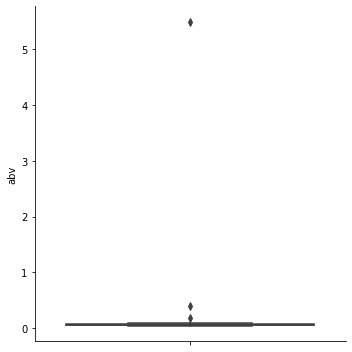

In [179]:
sns.catplot(kind='box', data = df, y = 'abv')

In [180]:
df['abv'].describe()  # Q1, Q3 지점을 확인할 수 있다.

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [187]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1 
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  # 이상점 조건

In [188]:
df.loc[condition]

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
963,963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


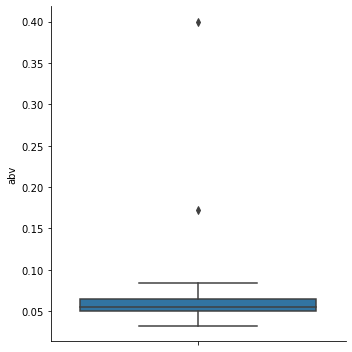

In [191]:
df.loc[2250, 'abv'] = 0.055  # 이상점 수정
sns.catplot(kind='box', data = df, y = 'abv')

In [202]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  # 이상점 조건
df[condition].index

Int64Index([], dtype='int64')

In [203]:
df.drop(df[condition].index, inplace = True)  # 이상점 제거

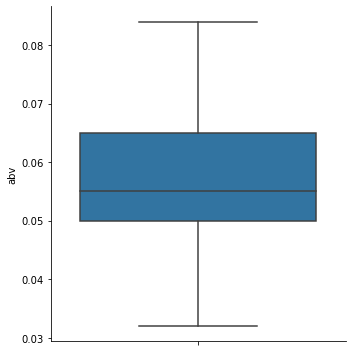

In [204]:
sns.catplot(kind='box', data = df, y = 'abv')